In [ ]:
from keras.models import Sequential

In [3]:
from keras.layers import Convolution2D

In [4]:
cnn = Sequential()

In [5]:
cnn.add( Convolution2D( 32, 3, 3, input_shape = ( 64, 64, 3  ), activation = 'relu' ) )

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [6]:
from keras.layers import MaxPooling2D

In [7]:
#Applying Pooling the CNN
cnn.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )

In [8]:
#Adding one more Convolution Layer
cnn.add( Convolution2D( 32, 3, 3, activation = 'relu' ) )
cnn.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [9]:
#Adding one more Convolution Layer
cnn.add( Convolution2D( 32, 3, 3, activation = 'relu' ) )
cnn.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [10]:
from keras.layers import Flatten

In [11]:
#Flattening - Input Layer for ANN.

cnn.add( Flatten() )

In [12]:
from keras.layers import Dense

In [13]:
cnn.add( Dense( output_dim = 128, activation = 'relu') )

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.


In [14]:
cnn.add( Dense( output_dim = 1, activation = 'sigmoid' ) )

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  """Entry point for launching an IPython kernel.


In [15]:
cnn.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
#Image Augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,                 #Divide the Image by 255 to make all the pixel value from 0 to 1 as RGBrange 
                                                                                                    #is from 0 to 255. 
        shear_range=0.2,                #Shering Intensiry
        zoom_range=0.2,                 #Zooming Intensity
        horizontal_flip=True,           #Flipping the Image Horizintaly.
        vertical_flip = True)

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_set = train_datagen.flow_from_directory('DataSet/train_data',               #path for the training set
                                                target_size=(64, 64),           #Expected Size/dimension of Image.
                                                                                       #same as input_shape of Convolution2D()
                                                batch_size=32,                    #Every time 32 Images will be taken in batch.
                                                class_mode='binary')            #As output we have only 2 types cats and dogs.
                                                                                        #so, class_mode = 'binary'.

Found 25000 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory('DataSet/test_data',
                                            target_size=(64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary' )

Found 430 images belonging to 2 classes.


In [21]:
cnn.fit_generator(  train_set ,
                    samples_per_epoch = 25000,               #No of Images in training data folder
                    nb_epoch = 10,                           #no. of epoch/ no/ of iteration of CNN.
                    validation_data = test_set,
                    nb_val_samples = 430)               #No of Images in testing data folder

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=781, epochs=10, validation_steps=430)`
  """


Epoch 1/10


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [ ]:
from keras.preprocessing import image

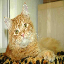

In [31]:
cat_test_image = image.load_img( 'DataSet/Single_prediction/Cat_image.jpg'
                              , target_size = ( 64, 64 ) )    

#we trained our image with target_size as (64, 64). So, while testing also target must be same as training target_size.

cat_test_image

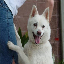

In [32]:
dog_test_image = image.load_img( 'DataSet/Single_prediction/Dog_image.jpg'
                              , target_size = ( 64, 64 ) )
dog_test_image

In [33]:
cat_test_image_arr = image.img_to_array( cat_test_image )
dog_test_image_arr = image.img_to_array( dog_test_image )

print( f"cat_test_image_arr.shape = { cat_test_image_arr.shape } and type( cat_test_image_arr ) = { type( cat_test_image_arr ) }" )
print( f"dog_test_image_arr.shape = { dog_test_image_arr.shape } and type( dog_test_image_arr ) = { type( dog_test_image_arr ) }" )

cat_test_image_arr.shape = (64, 64, 3) and type( cat_test_image_arr ) = <class 'numpy.ndarray'>
dog_test_image_arr.shape = (64, 64, 3) and type( dog_test_image_arr ) = <class 'numpy.ndarray'>


In [34]:
import numpy as np

In [35]:
cat_test_image_arr = np.expand_dims( cat_test_image_arr, axis = 0 )
dog_test_image_arr = np.expand_dims( dog_test_image_arr, axis = 0 )

print( f"cat_test_image_arr.shape = { cat_test_image_arr.shape } and type( cat_test_image_arr ) = { type( cat_test_image_arr ) }" )
print( f"dog_test_image_arr.shape = { dog_test_image_arr.shape } and type( dog_test_image_arr ) = { type( dog_test_image_arr ) }" )

cat_test_image_arr.shape = (1, 64, 64, 3) and type( cat_test_image_arr ) = <class 'numpy.ndarray'>
dog_test_image_arr.shape = (1, 64, 64, 3) and type( dog_test_image_arr ) = <class 'numpy.ndarray'>


In [36]:
print( f"int( cnn.predict( cat_test_image_arr ) ) = { int( cnn.predict( cat_test_image_arr ) ) }" )
print( f"int( cnn.predict( dog_test_image_arr ) ) = { int( cnn.predict( dog_test_image_arr ) ) }" )

int( cnn.predict( cat_test_image_arr ) ) = 0
int( cnn.predict( dog_test_image_arr ) ) = 1


In [37]:
train_set.class_indices

{'Cat': 0, 'Dog': 1}

In [38]:
#Now, Trying to test multiple images,
import os

In [46]:
cat_pred_list = []

for i in os.listdir( 'DataSet/test_data/Cat/' ):
    cat_test_image = image.load_img( 'DataSet/test_data/Cat/'+i
                              , target_size = ( 64, 64 ) )
    
    cat_test_image_arr = image.img_to_array( cat_test_image )
    cat_test_image_arr = np.expand_dims( cat_test_image_arr, axis = 0 )
    
    print( f"int( cnn.predict( cat_test_image_arr ) ) = { int( cnn.predict( cat_test_image_arr ) ) }" )
    cat_pred_list.append( int( cnn.predict( cat_test_image_arr ) ) )

int( cnn.predict( cat_test_image_arr ) ) = 0
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 0
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 0
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.p

int( cnn.predict( cat_test_image_arr ) ) = 0
int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( cat_test_image_arr ) ) = 1


In [48]:
train_set.class_indices

{'Cat': 0, 'Dog': 1}

In [49]:
correct_pred = 0
wrong_pred = 0

for i in cat_pred_list:
    if( i == 0 ):
        correct_pred = correct_pred + 1
    else:
        wrong_pred = wrong_pred + 1
        
print( f"correct_pred = { correct_pred } and Correct % = { correct_pred/( len(cat_pred_list) ) }" )
print( f"wrong_pred = { wrong_pred } and Wrong % = { wrong_pred/( len(cat_pred_list) ) }" )

correct_pred = 52 and Correct % = 0.24186046511627907
wrong_pred = 163 and Wrong % = 0.7581395348837209
